<a href="https://colab.research.google.com/github/nipetrov/Homework-ML/blob/master/MLatFIAN2020_seminar03_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston housing dataset

Use the data and model from the seminar:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
columns = ["CRIM", "RM", "LSTAT"]

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)[columns]
X /= X.max()
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42)

model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    Ridge(alpha=0.1)
)

model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  19.312028078112938
test mse =  8.517501881762888


# Task 1

Use `sklearn.model_selection.cross_validate` to perform K-fold cross-validation of the model above. Plot histograms of train and test scores (`"neg_mean_squared_error"`) on the same plot.

Do that for 10 and 100 folds.

See the docs for more details about the function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [ ]:
from sklearn.model_selection import cross_validate

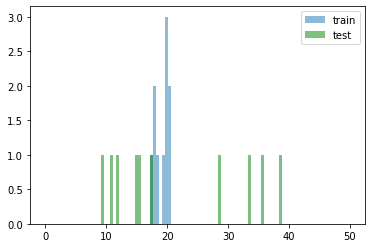

In [ ]:
 scores = cross_validate(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10, return_train_score=True)
 bins = np.linspace(0, 50, 100)
 plt.hist(-scores['train_score'], bins, label = 'train', alpha = 0.5)
 plt.hist(-scores['test_score'], bins, label = 'test', alpha = 0.5, color= 'green');
 plt.legend(loc='upper right')
 plt.show()
 #scores['test_score']

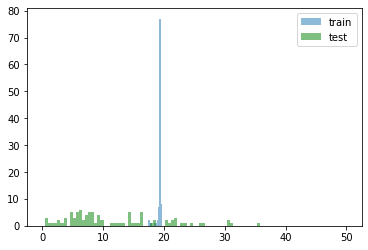

In [ ]:
 scores = cross_validate(model, X_train, y_train, scoring='neg_mean_squared_error', cv=100, return_train_score=True)
 bins = np.linspace(0, 50, 100)
 bins2 = np.linspace(0, 50, 250)
 plt.hist(-scores['train_score'], bins2, label = 'train', alpha = 0.5)
 plt.hist(-scores['test_score'], bins, label = 'test', alpha = 0.5, color= 'green');
 plt.legend(loc='upper right')
 plt.show()